# IBM HR Iteration Pridiction Model

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Read

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\EmployeeAttrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Explore data

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9204\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# Data Cleaning

In [12]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Data redundancy check

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(['Over18','StandardHours','EmployeeNumber','EmployeeCount'],axis=1,inplace=True)

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Data Visulization

In [16]:
df.select_dtypes('int')

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [17]:
df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


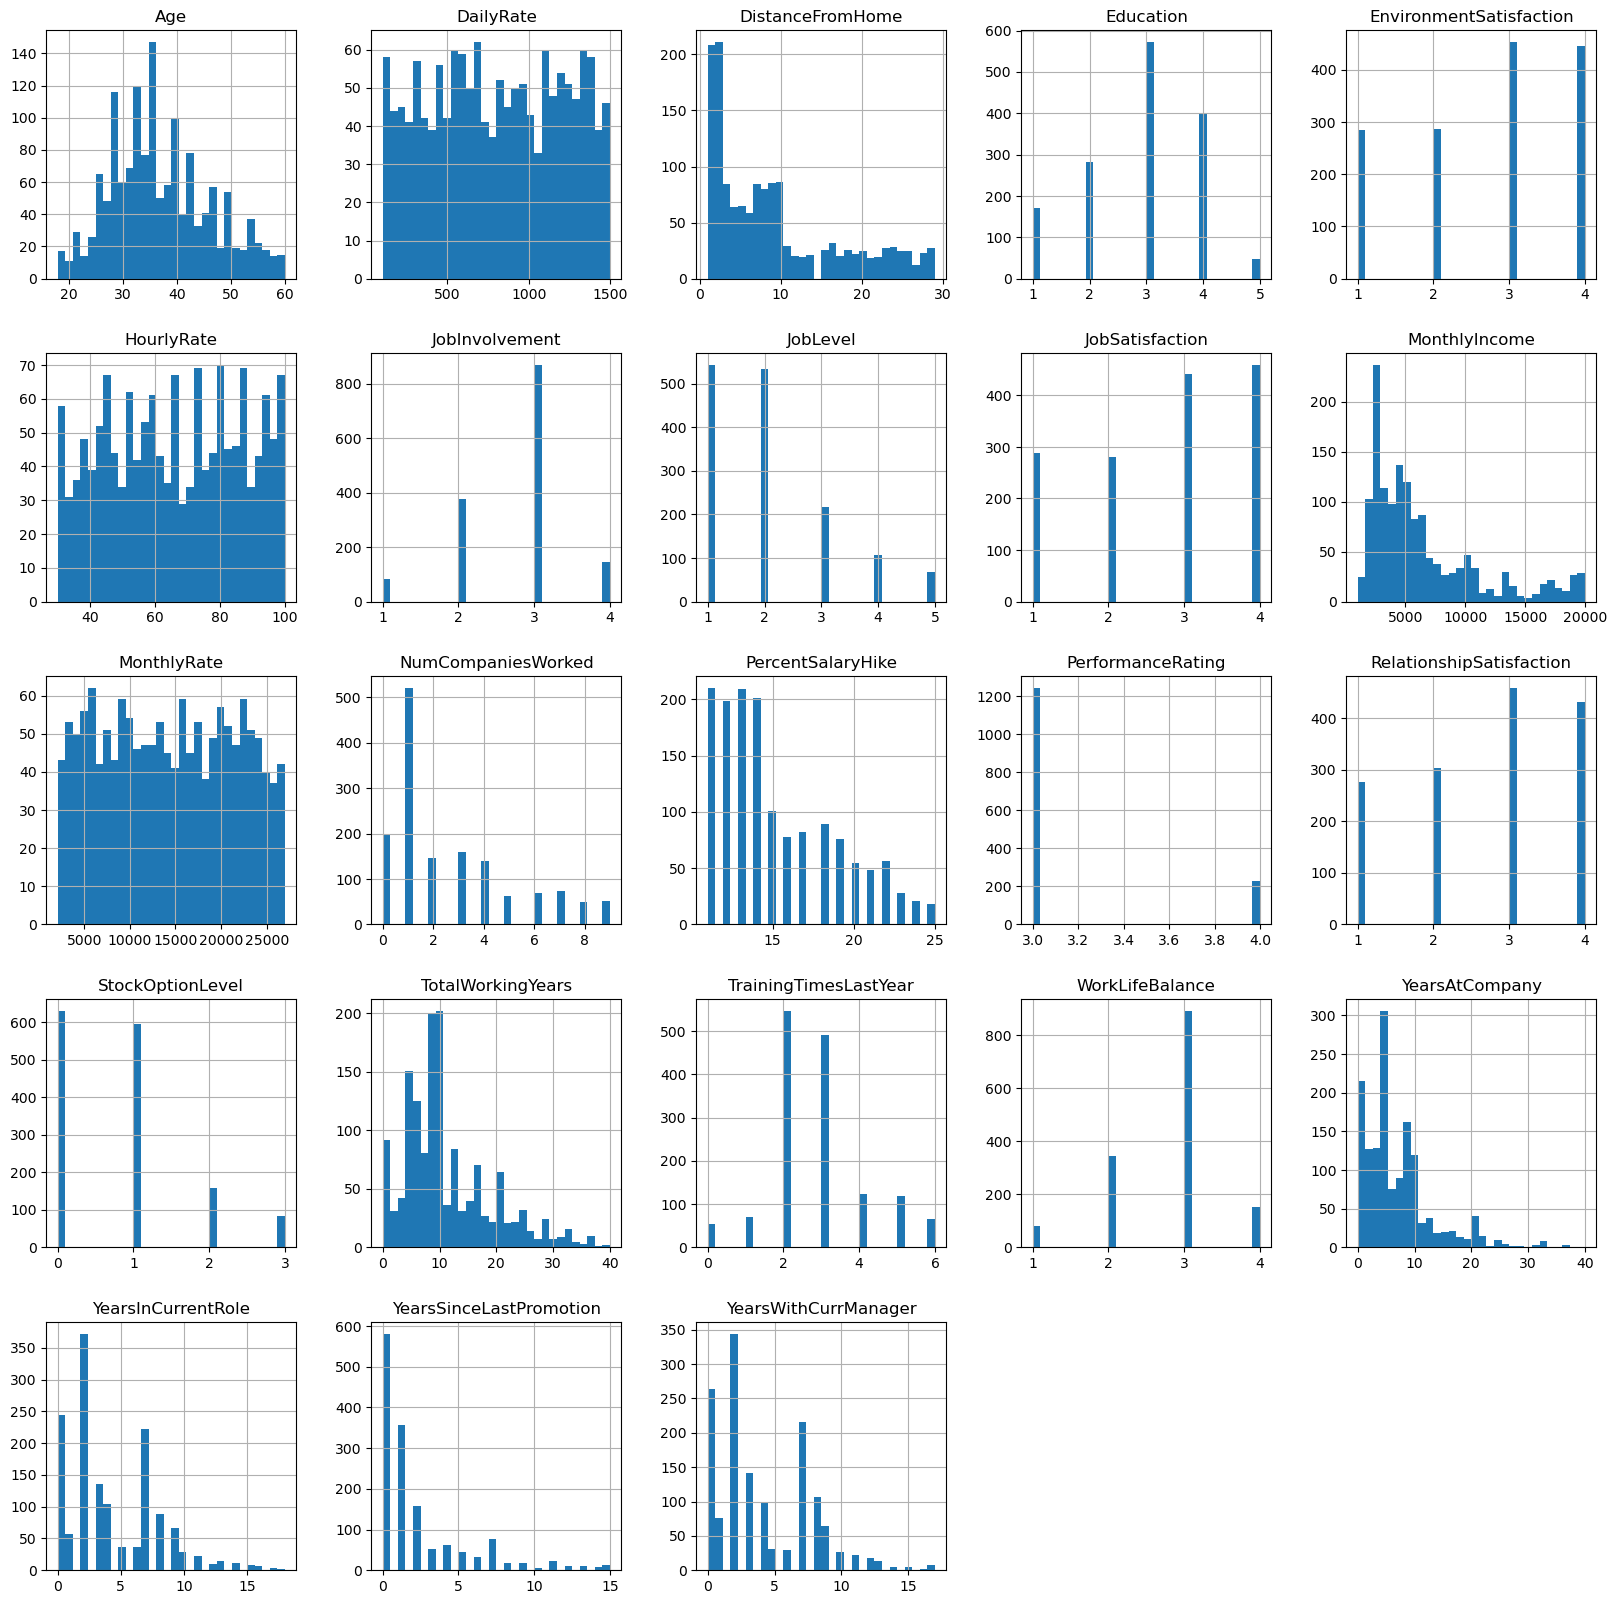

In [19]:
df.hist(bins=30,figsize=(20,20));

<Axes: xlabel='Age', ylabel='count'>

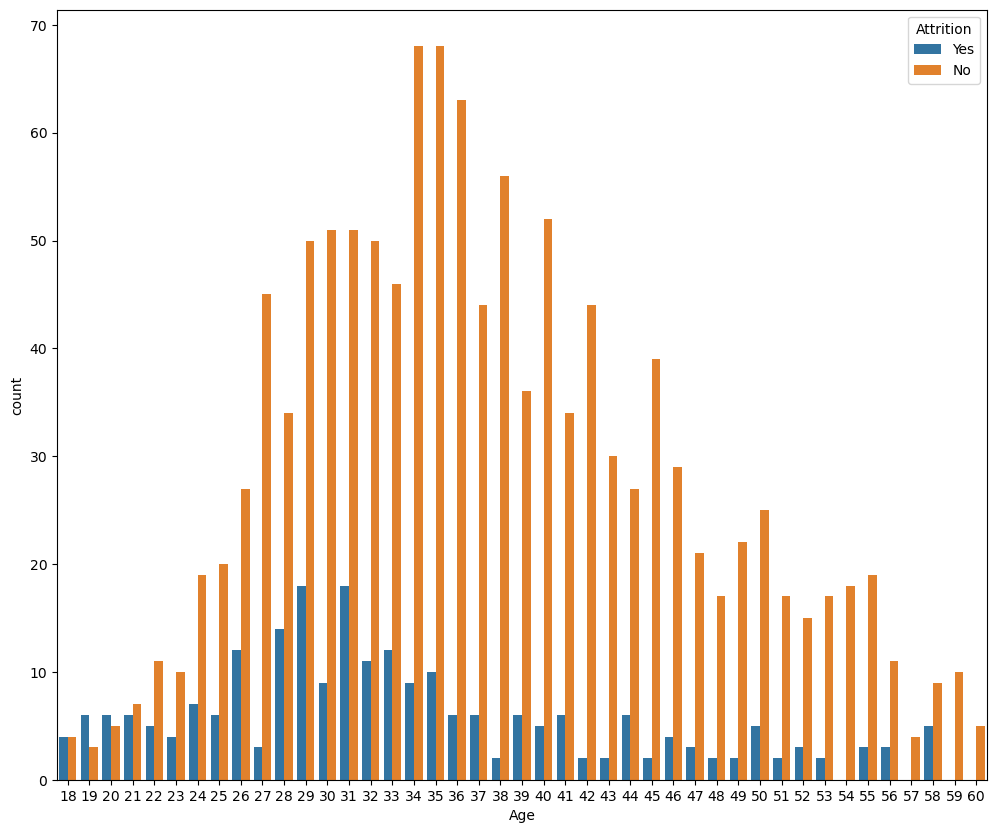

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(x="Age", hue='Attrition', data=df)

<Axes: xlabel='JobRole', ylabel='count'>

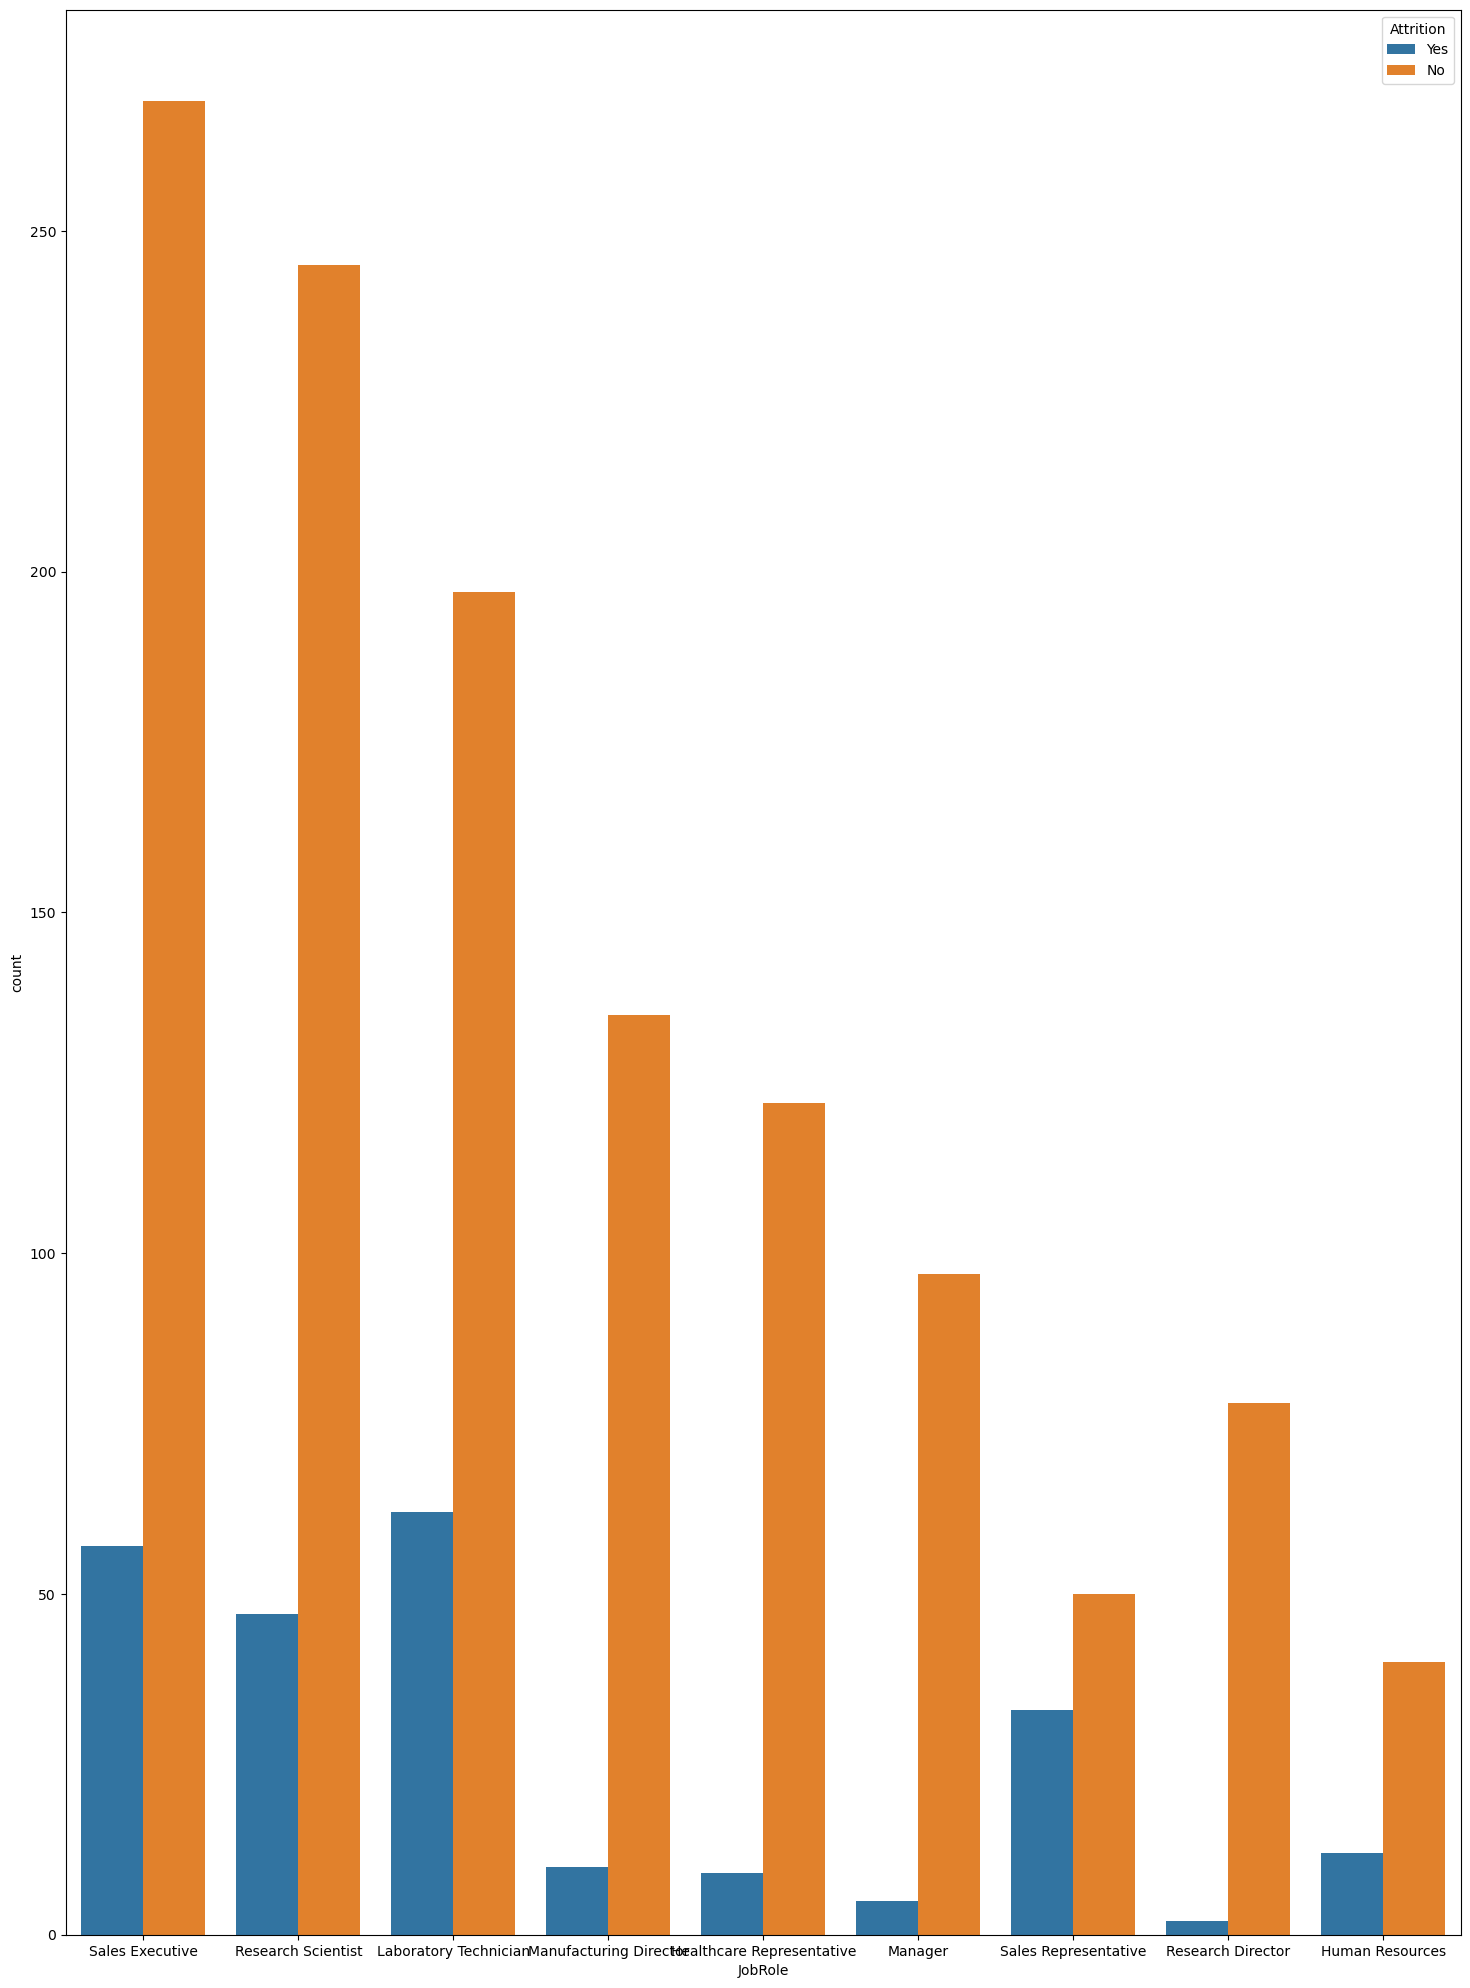

In [21]:
plt.figure(figsize=(18,25))
sns.countplot(x="JobRole", hue='Attrition', data=df)

<Axes: xlabel='Gender', ylabel='count'>

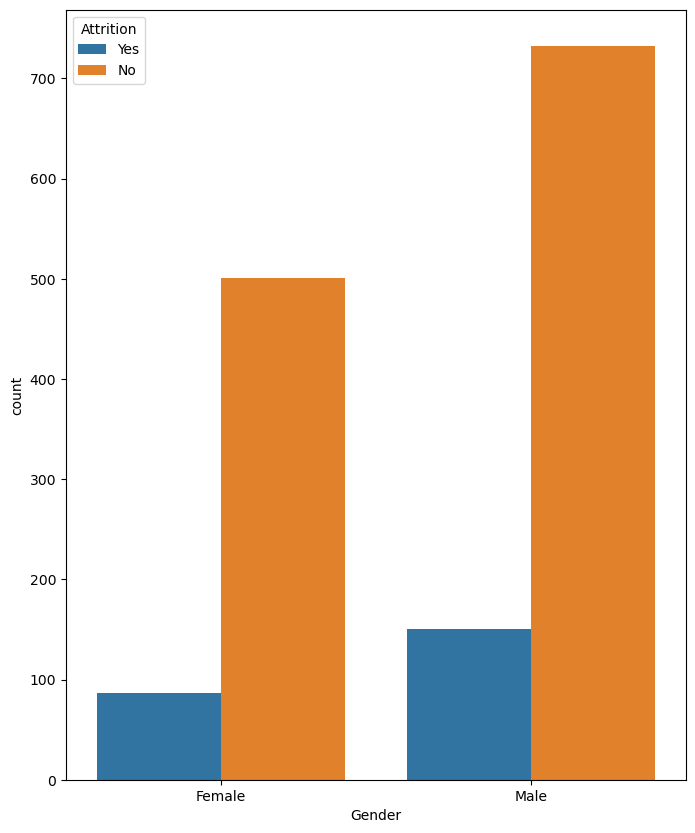

In [22]:
plt.figure(figsize=(8,10))
sns.countplot(x="Gender", hue='Attrition', data=df)

# Data inspection

In [25]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
# In this data set show this is imbalance data set because attrition yes count=1233, no=237

# Data model creation in imbalance data set

In [26]:
y = df['Attrition']
X = df.drop(['Attrition'],axis=1)

# Data Encoding

In [29]:
X = pd.get_dummies(X)
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,1,0,0,1,0,1,0


# train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2529)

# select model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# train

In [32]:
model.fit(X_train,y_train)

RandomForestClassifier()

# Predict

In [33]:
y_pred = model.predict(X_test)

# Evaluate

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       313
         Yes       0.77      0.18      0.29        55

    accuracy                           0.87       368
   macro avg       0.82      0.59      0.61       368
weighted avg       0.86      0.87      0.83       368



In [35]:
confusion_matrix(y_test,y_pred)

array([[310,   3],
       [ 45,  10]], dtype=int64)

# Hyperparameter tuning

In [37]:
param = {'n_estimators': [100,200,300,400,500],
              'max_depth': range(1,10),
              'criterion':['gini','entropy']}

In [38]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid= param,
                    scoring = 'accuracy',
                    cv = 5)

In [39]:
grid = GridSearchCV(estimator = model,
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5)

In [40]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [41]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9)

In [42]:
y_pred = grid.predict(X_test)

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       1.00      0.86      0.93       362
         Yes       0.11      1.00      0.20         6

    accuracy                           0.87       368
   macro avg       0.55      0.93      0.56       368
weighted avg       0.99      0.87      0.92       368



In [44]:
# Model accuracy is 87% but F1 score of Yes is 20% so model is not good due to imbalance data

# Imbalance Data Handling

In [45]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [46]:
X.shape, y.shape, y.value_counts()

((1470, 51),
 (1470,),
 No     1233
 Yes     237
 Name: Attrition, dtype: int64)

In [47]:
X_ros.shape, y_ros.shape, y_ros.value_counts()

((2466, 51),
 (2466,),
 Yes    1233
 No     1233
 Name: Attrition, dtype: int64)

In [48]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=2529)

In [49]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [50]:
# train
model.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
# predcit
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      0.96      0.98       298
         Yes       0.96      1.00      0.98       319

    accuracy                           0.98       617
   macro avg       0.98      0.98      0.98       617
weighted avg       0.98      0.98      0.98       617



In [53]:
confusion_matrix(y_test,y_pred)

array([[285,  13],
       [  0, 319]], dtype=int64)

In [54]:
# Hyper parameter tuning
param = {'n_estimators': [100,200,300,400,500],
              'max_depth': range(1,10),
              'criterion':['gini','entropy']}

In [57]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid= param,
                    scoring = 'accuracy',
                    cv = 5)

In [58]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [59]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=200)

In [60]:
y_pred = grid.predict(X_test)

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.94      0.94      0.94       297
         Yes       0.94      0.94      0.94       320

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617



# Model accuracy is 94% but F1 score of Yes is 94% so model is  good due to balance data .